# SVM - SVR

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# data = pd.read_csv('D:/APU/CT108-3-3 - OCDS/Lab Sessions/Lab8 - SVM/kc_house_data.csv')
from google.colab import files
file = files.upload()
import io
data = pd.read_csv(io.BytesIO(file['kc_house_data.csv']))
data.head()

Saving kc_house_data.csv to kc_house_data.csv


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data = data.drop(['id', 'date', 'yr_renovated', 'zipcode', 'lat', 'long'], axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1800,7503


In [4]:
data.shape

(21613, 15)

In [5]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,6210.000000,871200.000000


In [6]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
sqft_living15    0
sqft_lot15       0
dtype: int64

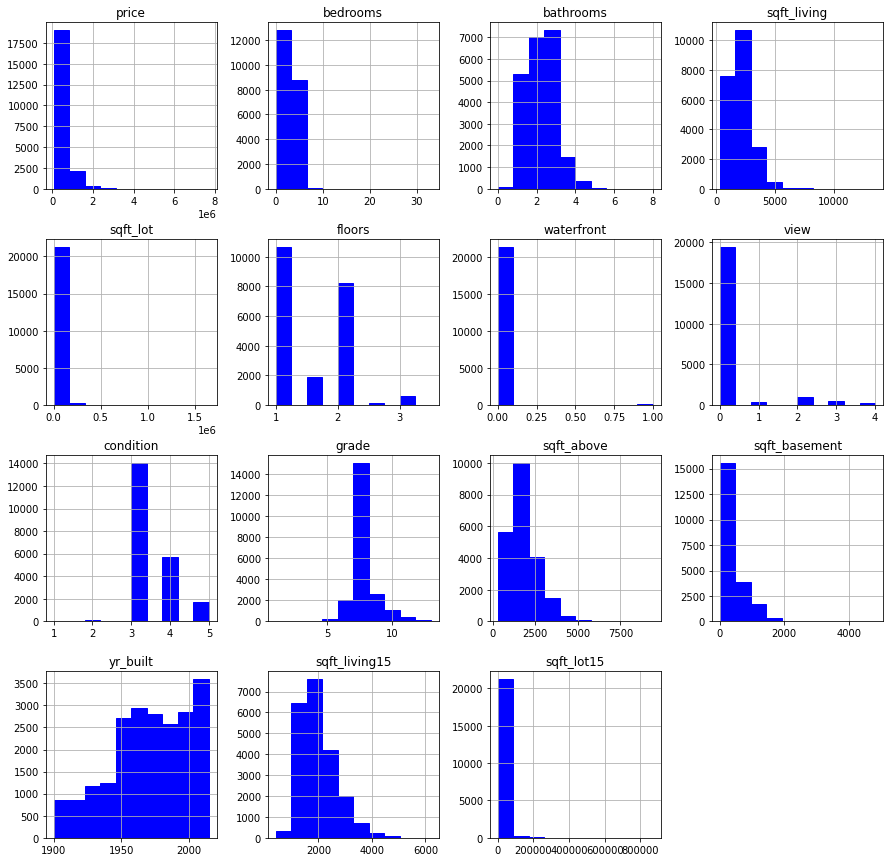

In [7]:
data.hist(figsize=(15,15), edgecolor="blue", color="blue")
plt.show()

In [8]:
X = data.iloc[:, 1:14].values
y = data.iloc[:, 0].values

In [9]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [10]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

**Using Linear Kernel**

In [ ]:
import math
grid_search_svr_lnr = GridSearchCV(estimator=SVR(kernel='linear'),
                       param_grid={'C': [0.1, 1, 10, 100],
                                   'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],},
                       cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = grid_search_svr_lnr.fit(X_train, y_train)
best_params = grid_result.best_params_
print(best_params)

best_svr = SVR(kernel='linear', C=best_params["C"], epsilon=best_params["epsilon"], coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)

scoring = {'abs_error': 'neg_mean_absolute_error', 'squared_error': 'neg_mean_squared_error'}

scores = cross_validate(best_svr, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

LMAE=abs(scores['test_abs_error'].mean())
LRMSE=math.sqrt(abs(scores['test_squared_error'].mean()))

print('\nMAE of Linear Kernel = ', LMAE)
print('RMSE of Linear kernel = ', LRMSE)

MAE of Linear Kernel =  136460.70390100873
RMSE of Linear kernel =  236861.4314407143


In [ ]:
best_svr.fit(X_train, y_train)
y_pred_lnr = best_svr.predict(X_test)
y_pred_lnr

array([ 354721.60546513, 1236021.43461406,  454363.52284555, ...,
        318649.8047675 ,  273386.44746745,  378460.58205474])

In [ ]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lnr.round(2)})
df2.head()

,Actual,Predicted
0,297000.0,354721.61
1,1578000.0,1236021.43
2,562100.0,454363.52
3,631500.0,517677.92
4,780000.0,740832.01


**Using Polynomial Kernel**

In [ ]:
import math
grid_search_svr_poly = GridSearchCV(estimator=SVR(kernel='poly'),
                      param_grid={
                                  'C': [0.1, 1, 100, 1000],
                                  'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                                  'degree': [2, 3, 4],
                                  'coef0': [0.1, 0.01, 0.001, 0.0001]},
                                  cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = grid_search_svr_poly.fit(X_train, y_train)
best_params = grid_result.best_params_
print(best_params)

best_svr = SVR(kernel='poly', C=best_params["C"], epsilon=best_params["epsilon"], coef0=best_params["coef0"],
               degree=best_params["degree"], shrinking=True,
               tol=0.001, cache_size=200, verbose=False, max_iter=-1)

scoring = {'abs_error': 'neg_mean_absolute_error', 'squared_error': 'neg_mean_squared_error'}

scores = cross_validate(best_svr, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

PMAE=abs(scores['test_abs_error'].mean())
PRMSE=math.sqrt(abs(scores['test_squared_error'].mean()))

print('\nMAE of Polynomial Kernel = ', PMAE)
print('RMSE of Polynomial kernel = ', PRMSE)

{'C': 1000, 'coef0': 0.1, 'degree': 2, 'epsilon': 10}

MAE of Polynomial Kernel =  141308.08747534177
RMSE of Polynomial kernel =  222334.2828822788


In [ ]:
best_svr.fit(X_train, y_train)
y_pred_poly = best_svr.predict(X_test)
y_pred_poly

array([ 382817.94866026, 1380282.07613025,  373608.38159535, ...,
        365070.82756312,  336730.69226763,  375703.56198225])

In [ ]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_poly.round(2)})
df3.head()

,Actual,Predicted
0,297000.0,382817.95
1,1578000.0,1380282.08
2,562100.0,373608.38
3,631500.0,403031.49
4,780000.0,710806.37


**Using RBF Kernel**

In [12]:
import math
grid_search_svr_rbf = GridSearchCV(estimator=SVR(kernel='rbf'),
                                    param_grid={
                                                'C': [0.1, 1, 100, 1000],
                                                'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                                                'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
                                                },
                                                cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = grid_search_svr_rbf.fit(X_train, y_train)
best_params = grid_result.best_params_
print(best_params)

best_svr = SVR(kernel='rbf', C=best_params["C"], epsilon=best_params["epsilon"], gamma=best_params["gamma"],
                   coef0=0.1, shrinking=True,
                   tol=0.001, cache_size=200, verbose=False, max_iter=-1)

scoring = {'abs_error': 'neg_mean_absolute_error', 'squared_error': 'neg_mean_squared_error'}

scores = cross_validate(best_svr, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

RMAE=abs(scores['test_abs_error'].mean())
RRMSE=math.sqrt(abs(scores['test_squared_error'].mean()))

print('\nMAE of RBF Kernel = ', RMAE)
print('RMSE of RBF kernel = ', RRMSE)

{'C': 1000, 'epsilon': 10, 'gamma': 0.005}

MAE of RBF Kernel =  164225.0430122824
RMSE of RBF kernel =  297770.91387093946


In [13]:
best_svr.fit(X_train, y_train)
y_pred_rbf = best_svr.predict(X_test)
y_pred_rbf

array([391979.59941402, 928431.24940221, 381734.92516226, ...,
       374860.3647506 , 314929.24320906, 398757.50320141])

In [14]:
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rbf.round(2)})
df4.head()

,Actual,Predicted
0,297000.0,391979.60
1,1578000.0,928431.25
2,562100.0,381734.93
3,631500.0,413973.86
4,780000.0,673429.26
